<a href="https://colab.research.google.com/github/nstagnaro/mat281-repository/blob/main/Lab072-NicolásStagnaro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°072


<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1hG9C4e6Tisw2VTEatGkP_hRmnZNpbXK4" width = "300" align="center"/>


El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
     * Regresión logística
     * K-Nearest Neighbours 
     * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [27]:
digits.tail()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9
1796,0,0,10,14,8,1,0,0,0,2,...,0,0,1,8,12,14,12,1,0,8


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
# Distribucion
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [7]:
# Distribucion, dtypes y memoria usada
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

In [8]:
# Registros por clase
digits['target'].value_counts()
# Se observa que las clases estan bastante equilibradas

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

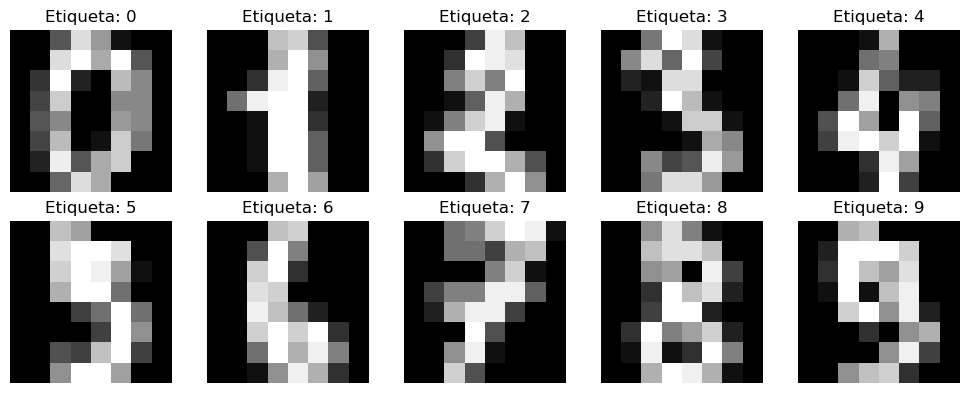

In [9]:
# Graficar imagenes de la muestra
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.iloc[i, :-1].values.reshape(8,8), cmap="gray")
    ax.set_title(f"Etiqueta: {digits.iloc[i, -1]}")
    ax.axis("off")
plt.tight_layout()
plt.show()
# Las etiquetas tienen sentido con el problema, por lo que no hay registros que no se correspondan con el conocimiento previo de los datos

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [10]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

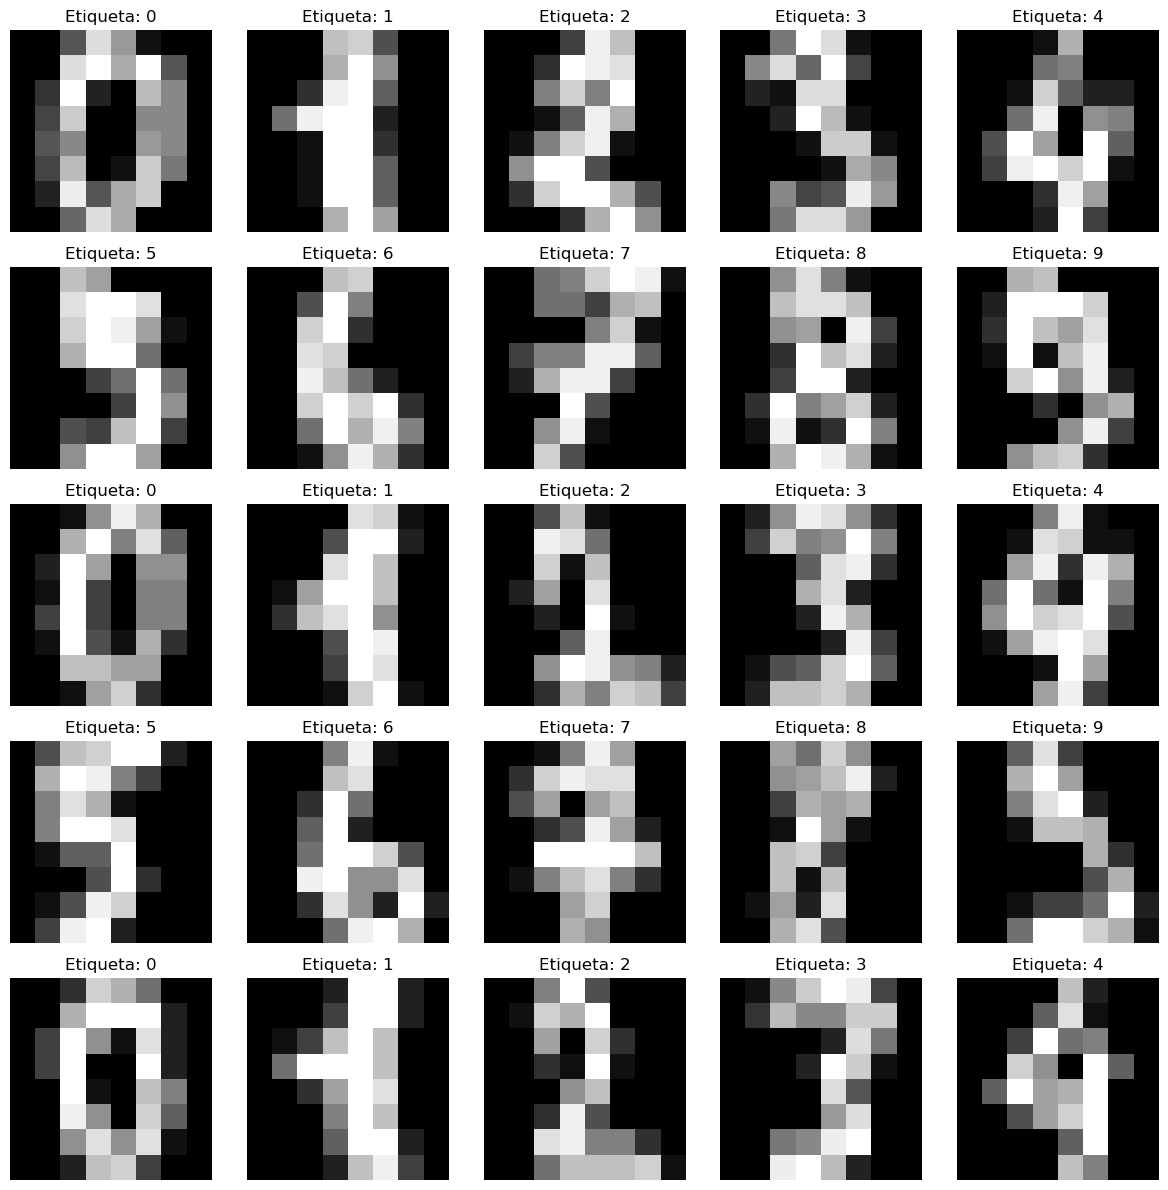

In [11]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i, ax in enumerate(axs.flat):
    ax.imshow(digits_dict["images"][i], cmap="gray")
    ax.set_title(f"Etiqueta: {digits_dict['target'][i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [12]:
# Como al ojo se ven bien las diferencias, es de esperar que los algoritmos lo hagan mejor que uno al ojo.

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `sklearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [13]:
# Evaluar las metricas
def classification_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Aplicar las distintas métricas definidas
    :param df: dataframe con las columnas: ['y', 'yhat']
    :return: dataframe con las métricas especificadas
    """
    y_true = df['y']
    y_pred = df['yhat']

    accuracy = round(accuracy_score(y_true, y_pred), 4)
    recall = round(recall_score(y_true, y_pred, average='macro'), 4)
    precision = round(precision_score(y_true, y_pred, average='macro'), 4)
    fscore = round(f1_score(y_true, y_pred, average='macro'), 4)

    df_result = pd.DataFrame({'accuracy': [accuracy],
                              'recall': [recall],
                              'precision': [precision],
                              'fscore': [fscore]})

    return df_result

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Matriz de confusion:")
    print(confusion_matrix(y_test, y_pred))
    print("\nMetricas de Clasificacion:")
    metrics_df = classification_metrics(pd.DataFrame({'y': y_test, 'yhat': y_pred}))
    print(metrics_df)

In [14]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

#Dividimos los datos en testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de testeo:", len(X_test))

Tamaño del conjunto de entrenamiento: 1437
Tamaño del conjunto de testeo: 360


In [15]:
# Modelos
logistic_model = LogisticRegression(solver='sag', max_iter=1000)
knn_model = KNeighborsClassifier()
random_forest_model = RandomForestClassifier()

# Entrenamiento de los modelos
logistic_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
print("Metricas para el modelo de Regresion Logistica:\n")
evaluate_model(logistic_model, X_test, y_test)

Metricas para el modelo de Regresion Logistica:

Matriz de confusion:
[[33  0  0  0  1  0  1  0  0  0]
 [ 0 30  0  1  0  0  0  0  0  5]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  2  0  1  6  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  2  0  0  0 35  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  1  0  0  1  0  0 33  1  0]
 [ 0  2  0  0  1  2  0  0 28  0]
 [ 0  2  0  0  0  0  0  0  1 34]]

Metricas de Clasificacion:
   accuracy  recall  precision  fscore
0    0.9056  0.9055     0.9102  0.9058


In [17]:
print("Metricas para el modelo de K-Nearest Neighbors:\n")
evaluate_model(knn_model, X_test, y_test)

Metricas para el modelo de K-Nearest Neighbors:

Matriz de confusion:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  1  0  1  1  0]
 [ 0  0  0  0 35  0  0  1  1  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  1 30  0]
 [ 0  0  0  1  0  2  0  0  0 34]]

Metricas de Clasificacion:
   accuracy  recall  precision  fscore
0    0.9639  0.9637     0.9648  0.9635


In [18]:
print("Metricas para el modelo de Random Forest:\n")
evaluate_model(random_forest_model, X_test, y_test)

Metricas para el modelo de Random Forest:

Matriz de confusion:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  3]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  2  0  1  9  0]
 [ 0  0  0  0 34  0  0  3  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  1  1  0  1 27  1]
 [ 0  0  0  0  0  2  0  0  1 34]]

Metricas de Clasificacion:
   accuracy  recall  precision  fscore
0    0.9194  0.9191     0.9242  0.9174


In [19]:
# Evaluar los modelos y almacenar los resultados en un solo dataframe
results = []

# Evaluar Regresion Logistica
y_pred_logistic = logistic_model.predict(X_test)
logistic_metrics = classification_metrics(pd.DataFrame({'y': y_test, 'yhat': y_pred_logistic}))
results.append(logistic_metrics.assign(model = 'logistic'))

# Evaluar K-Nearest Neighbors
y_pred_knn = knn_model.predict(X_test)
knn_metrics = classification_metrics(pd.DataFrame({'y': y_test, 'yhat': y_pred_knn}))
results.append(knn_metrics.assign(model = 'knn'))

# Evaluar Random Forest
y_pred_random_forest = random_forest_model.predict(X_test)
random_forest_metrics = classification_metrics(pd.DataFrame({'y': y_test, 'yhat': y_pred_random_forest}))
results.append(random_forest_metrics.assign(model = 'random forest'))

# Concatenar en un solo dataframe
df_results = pd.concat(results).reset_index(drop=True).sort_values('accuracy')

print("Resultados de metricas para los tres modelos:")
df_results

Resultados de metricas para los tres modelos:


,accuracy,recall,precision,fscore,model
0,0.9056,0.9055,0.9102,0.9058,logistic
2,0.9194,0.9191,0.9242,0.9174,random forest
1,0.9639,0.9637,0.9648,0.9635,knn


Basado en las metricas anteriores, el modelo knn es el mejor para este caso, pues es el mas las acerca a 1.

In [20]:
# Tiempo del Regresor Logistico
start_time = time.time() #Inicia
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_time = time.time() - start_time #Termina
print("Tiempo de ejecucion del Regresor Logistico:", logistic_time)

Tiempo de ejecucion del Regresor Logistico: 2.1196489334106445


In [21]:
# Tiempo del Random Forest
start_time = time.time() #Inicia
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_time = time.time() - start_time #Termina
print("Tiempo de ejecucion del Random Forest:", random_forest_time)

Tiempo de ejecucion del Random Forest: 0.2549927234649658


In [22]:
# Tiempo del KNN
start_time = time.time() #Inicia
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_time = time.time() - start_time #Termina
print("Tiempo de ejecucion del KNN:", knn_time)

Tiempo de ejecucion del KNN: 0.020931005477905273


Deducimos de lo anterior que el modelo que menos se demora es el KNN. Esto, junto al hecho de que este modelo es el que mejora las métricas, nos dice que es el mejor modelo a escoger.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

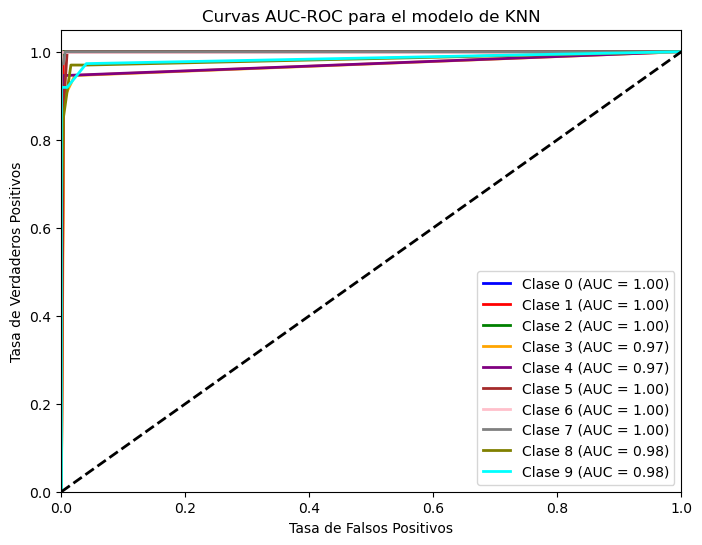

In [23]:
# Se trabaja con el modelo KNN, pues es el mejor por lo visto en el item anterior
# Obtener las probabilidades de predicción para cada clase
y_pred_proba = knn_model.predict_proba(X_test)

# Calcular la curva ROC y el puntaje AUC-ROC para cada clase
n_classes = len(knn_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas AUC-ROC para cada clase
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas AUC-ROC para el modelo de KNN')
plt.legend(loc="lower right")
plt.show()

Podemos observar del gráfico que para todas las clases el clasificador hace bien el trabajo, acercándose mucho al clasificador perfecto. Todo esto entendiendo que, mientras más se minimiza la tasa de falsos positivos y más se maximiza la tasa de verdaderos positivos, mejor es el clasificador. Otra forma de verlo es mediante el AUC, como todas las clases poseen un AUC muy cercano a 1, que es el ideal, entonces el modelo KNN funciona bien.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 

In [24]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular. 
    Se toman aleatoriamente los valores de los resultados.
    
    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))
    
    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)
    
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Resultados cuando el valor predicho y original son iguales:


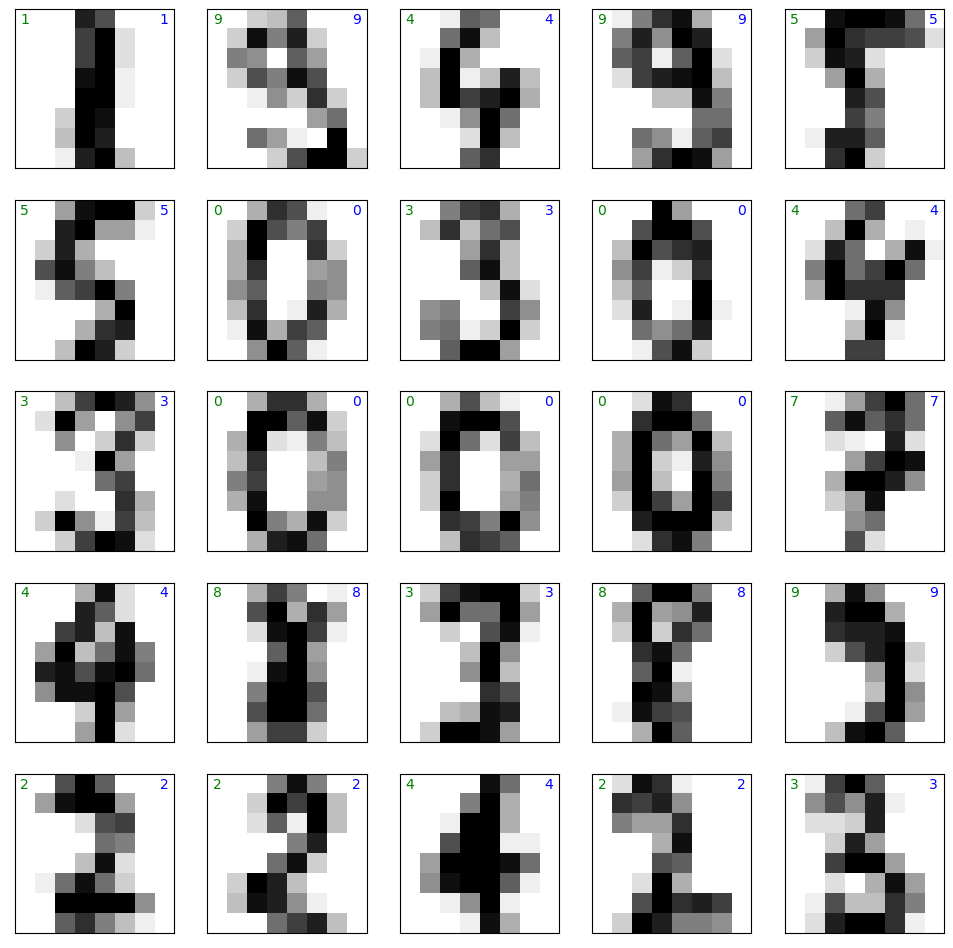

In [25]:
# Graficar los resultados cuando el valor predicho y original son iguales
print("Resultados cuando el valor predicho y original son iguales:")
mostrar_resultados(digits, knn_model, label="correctos")

Resultados cuando el valor predicho y original son distintos:


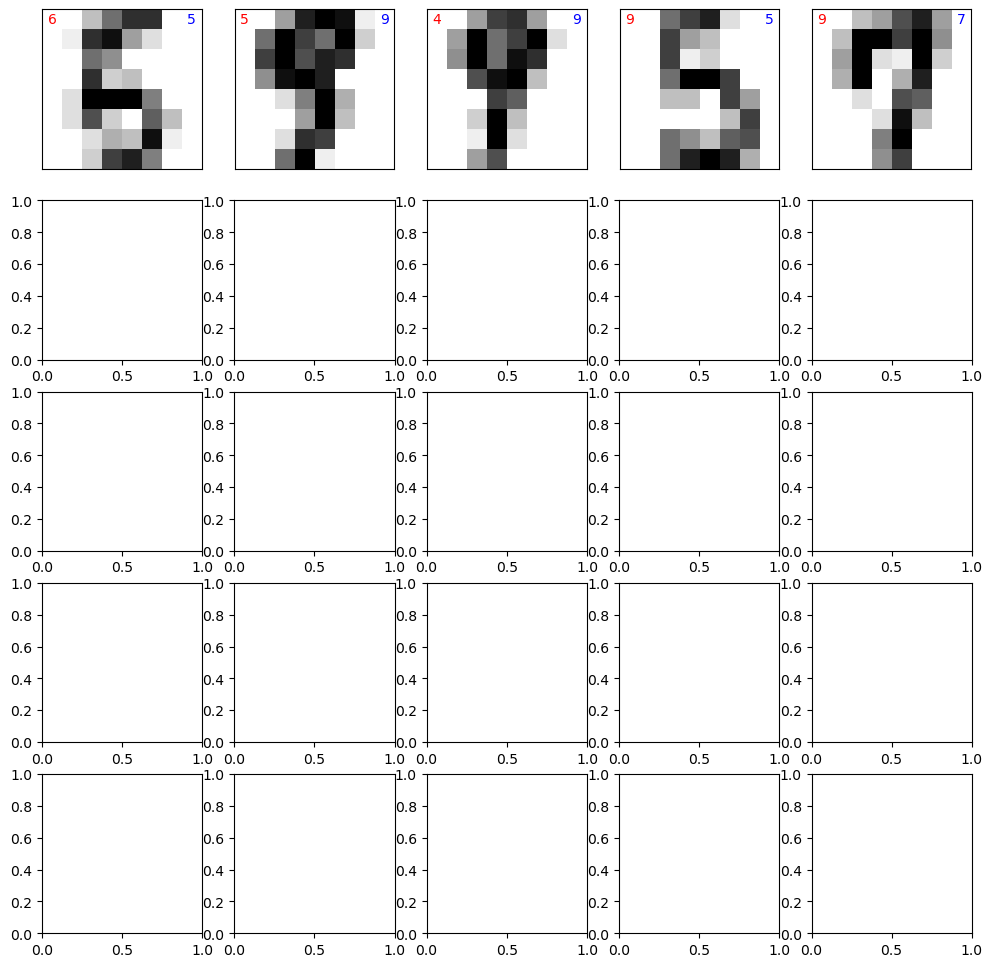

In [26]:
# Graficar los resultados cuando el valor predicho y original son distintos
print("Resultados cuando el valor predicho y original son distintos:")
mostrar_resultados(digits, knn_model, label="incorrectos")

Las fallas cuando el valor predicho y original no coinciden se deben a que cualquier algoritmo de machine learning no va apredecir siempre bien los outputs, lo cual puede ocurrir por el overfitting.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Algunas visualizaciones respecto al trabajo, con respecto a la normalización de los dados, es ver con boxplots si algunos atributos poseen outliers, para así dedicir si es lo mejor usar el "scaler" RobustScaler, pues cuando no hay outliers puede ser conveniente usar otros, etc. Agregar además, respecto a los algoritmos, que se podrían usar otros y hacer comparaciones de rendimiento segun las metricas de error, lo cual puede quedar como trabajo futuro. Existe por ejemplo el algoritmo de perceptron el cual es muy util para el caso de clasificacion binaria, pero que se puede extender a multi clases. La dificultad es que es mas tedioso que en otros algoritmos que por defecto sirven cuando se tienen multi clases.

Con respecto a las preguntas iniciales, se ajustaron los modelos de Regresión logística, K-Nearest Neighbours y Random Forest, se analizaron las metricas de error para cada una, se hicieron predicciones y se analizaron con la matriz de confusion, todo esto en el ejercicio 3.